# Task
Major Project - Data exploration and visualization from housing.csv
1.	How many houses are in the range of prices from 0-25lakhs, 26-50lakhs, 51-75lakhs, 76-100lakhs and >100lakhs. Visualize it using a line chart also
2.	Find average house prices for houses having AC and nonAC. Plot the relationship using a barchart.
3.	Simulate the relationship between parking and house price.
4.	What is price gap between the houses having <5000sqft & no prefarea , and >5000sqft & there is prefarea?


Here is all the data you need:
"Housing.csv"

## Data loading

### Subtask:
Load the housing data from "Housing.csv" into a pandas DataFrame.


**Reasoning**:
Load the housing data from "Housing.csv" into a pandas DataFrame and display its first few rows and shape.



In [6]:
import pandas as pd

try:
    df_housing = pd.read_csv('Housing.csv')
    display(df_housing.head())
    print(df_housing.shape)
except FileNotFoundError:
    print("Error: 'Housing.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


(545, 13)


## Data cleaning

### Subtask:
Clean the housing data.


**Reasoning**:
Inspect the DataFrame for missing values and inconsistencies in data types, then clean the data accordingly. This involves checking for missing values, handling them appropriately, and converting data types to ensure consistency.



In [7]:
# Inspect missing values
print(df_housing.isnull().sum())

# Handle missing values (if any) -  No missing values found, so no action needed.

# Data type handling
# Convert relevant columns to appropriate types
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df_housing[col] = df_housing[col].astype('category')

df_housing['parking'] = df_housing['parking'].astype(int)

# Convert yes/no to boolean for specific columns
mapping = {'yes': True, 'no': False}
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df_housing[col] = df_housing[col].map(mapping)


# Verify the cleaning process
print(df_housing.isnull().sum())
display(df_housing.head())
print(df_housing.dtypes)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished


price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus      object
dtype: object


## Data wrangling

### Subtask:
Create a new categorical column 'price_category' in the `df_housing` DataFrame based on the 'price' column.


**Reasoning**:
Create the 'price_category' column in df_housing using pd.cut and verify the result.



In [8]:
import pandas as pd

# Define bin edges and labels
bin_edges = [0, 2500000, 5000000, 7500000, 10000000, float('inf')]
bin_labels = ['0-25 lakhs', '26-50 lakhs', '51-75 lakhs', '76-100 lakhs', '>100 lakhs']

# Create the 'price_category' column
df_housing['price_category'] = pd.cut(df_housing['price'], bins=bin_edges, labels=bin_labels, right=False)

# Verify the new column
display(df_housing.head())
print(df_housing['price_category'].value_counts())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_category
0,13300000,7420,4,2,3,True,False,False,False,True,2,True,furnished,>100 lakhs
1,12250000,8960,4,4,4,True,False,False,False,True,3,False,furnished,>100 lakhs
2,12250000,9960,3,2,2,True,False,True,False,False,2,True,semi-furnished,>100 lakhs
3,12215000,7500,4,2,2,True,False,True,False,True,3,True,furnished,>100 lakhs
4,11410000,7420,4,1,2,True,True,True,False,True,2,False,furnished,>100 lakhs


price_category
26-50 lakhs     318
51-75 lakhs     148
76-100 lakhs     39
0-25 lakhs       32
>100 lakhs        8
Name: count, dtype: int64


## Data analysis

### Subtask:
Analyze the housing data to answer specific questions.


**Reasoning**:
Calculate the number of houses in each price category, average house prices for AC and non-AC houses, analyze the relationship between parking and house price, and calculate the price difference between two groups of houses.



In [9]:
# Calculate the number of houses in each price category
price_category_counts = df_housing['price_category'].value_counts()

# Calculate the average house price for houses with and without AC
average_price_ac = df_housing[df_housing['airconditioning'] == True]['price'].mean()
average_price_no_ac = df_housing[df_housing['airconditioning'] == False]['price'].mean()

# Analyze the relationship between parking and house price
parking_stats = df_housing.groupby('parking')['price'].agg(['mean', 'median', 'std'])
correlation_parking_price = df_housing['parking'].corr(df_housing['price'])

# Calculate the price difference between two groups of houses
group1 = df_housing[(df_housing['area'] < 5000) & (df_housing['prefarea'] == False)]
group2 = df_housing[(df_housing['area'] >= 5000) & (df_housing['prefarea'] == True)]

average_price_group1 = group1['price'].mean()
average_price_group2 = group2['price'].mean()
price_difference = average_price_group2 - average_price_group1

print("Price Category Counts:\n", price_category_counts)
print("\nAverage Price (AC):", average_price_ac)
print("Average Price (No AC):", average_price_no_ac)
print("\nParking Statistics:\n", parking_stats)
print("\nCorrelation between Parking and Price:", correlation_parking_price)
print("\nAverage Price (Group 1):", average_price_group1)
print("Average Price (Group 2):", average_price_group2)
print("Price Difference (Group 2 - Group 1):", price_difference)

Price Category Counts:
 price_category
26-50 lakhs     318
51-75 lakhs     148
76-100 lakhs     39
0-25 lakhs       32
>100 lakhs        8
Name: count, dtype: int64

Average Price (AC): 6013220.5813953485
Average Price (No AC): 4191939.678284182

Parking Statistics:
                  mean     median           std
parking                                       
0        4.136017e+06  3850000.0  1.359445e+06
1        5.190389e+06  4690000.0  1.879971e+06
2        5.896328e+06  5302500.0  2.169085e+06
3        5.867167e+06  4375000.0  3.210310e+06

Correlation between Parking and Price: 0.3843936486357259

Average Price (Group 1): 3827671.56133829
Average Price (Group 2): 6546807.692307692
Price Difference (Group 2 - Group 1): 2719136.130969402


## Data visualization

### Subtask:
Visualize the data analysis results.


**Reasoning**:
Visualize the data analysis results using matplotlib.



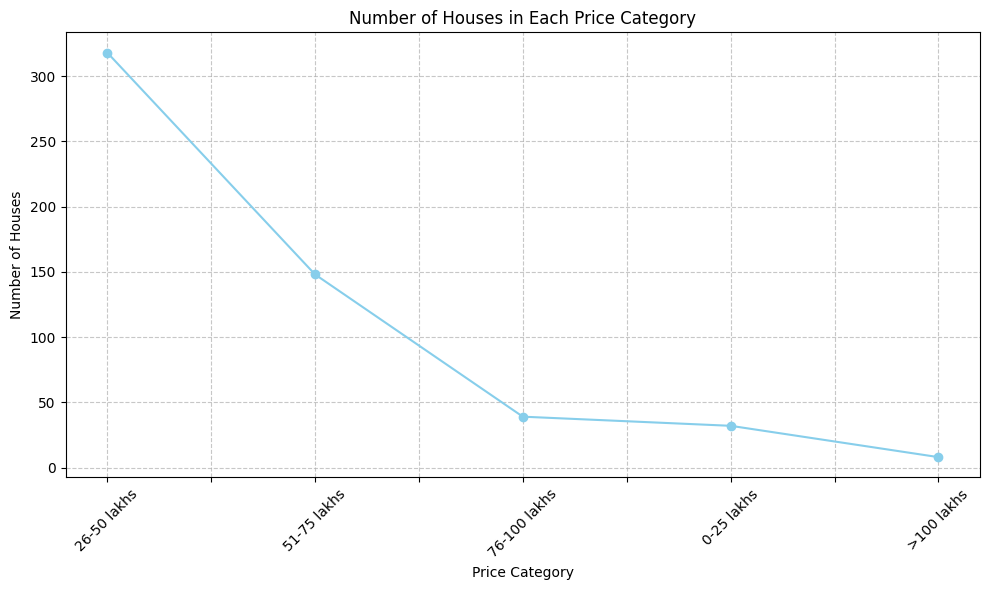

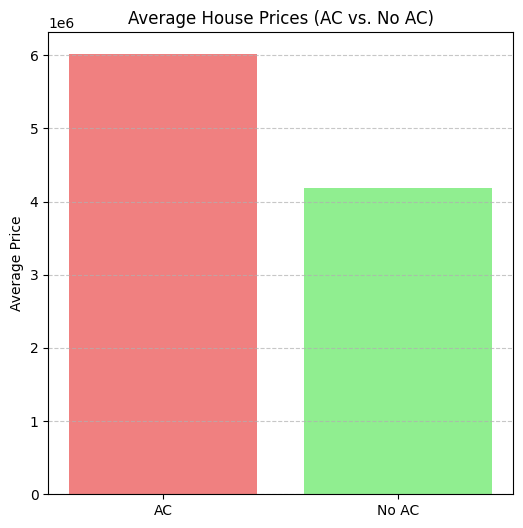

<ipython-input-10-9c1e79ca5465>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_housing[df_housing['parking'] == i]['price'] for i in range(4)], labels=[0,1,2,3])


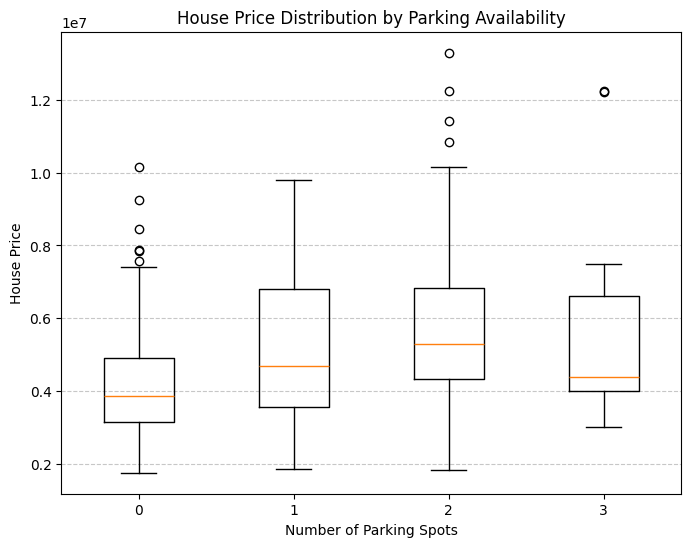

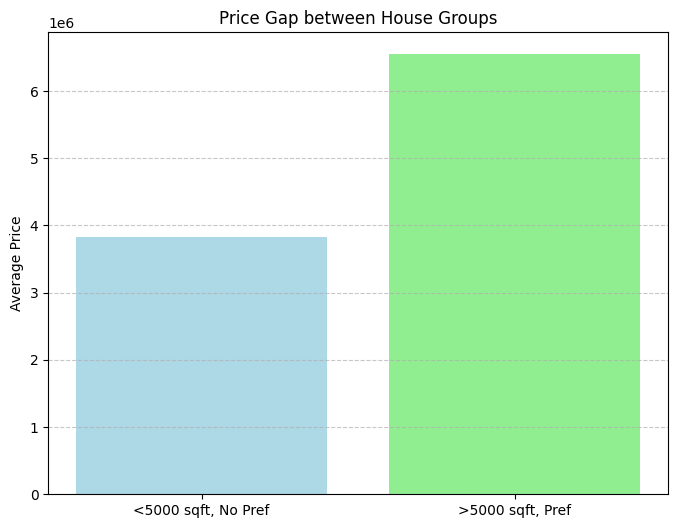

In [10]:
import matplotlib.pyplot as plt

# 1. Line chart for price categories
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Houses in Each Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Bar chart for average house prices (AC vs. No AC)
plt.figure(figsize=(6, 6))
plt.bar(['AC', 'No AC'], [average_price_ac, average_price_no_ac], color=['lightcoral', 'lightgreen'])
plt.title('Average House Prices (AC vs. No AC)')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Box plot for parking and house price
plt.figure(figsize=(8, 6))
plt.boxplot([df_housing[df_housing['parking'] == i]['price'] for i in range(4)], labels=[0,1,2,3])
plt.title('House Price Distribution by Parking Availability')
plt.xlabel('Number of Parking Spots')
plt.ylabel('House Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 4. Bar chart for price gap
plt.figure(figsize=(8, 6))
plt.bar(['<5000 sqft, No Pref', '>5000 sqft, Pref'], [average_price_group1, average_price_group2], color=['lightblue', 'lightgreen'])
plt.title('Price Gap between House Groups')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

### Q&A
* **How many houses are in the range of prices from 0-25lakhs, 26-50lakhs, 51-75lakhs, 76-100lakhs and \>100lakhs?**  The counts are as follows: 0-25 lakhs: 32 houses; 26-50 lakhs: 318 houses; 51-75 lakhs: 148 houses; 76-100 lakhs: 39 houses; and \>100 lakhs: 8 houses.
* **Find average house prices for houses having AC and nonAC.** The average price for houses with AC is approximately 6013220.58, while the average for houses without AC is approximately 4191939.68.
* **What is price gap between the houses having <5000sqft & no prefarea , and >5000sqft & there is prefarea?** The average price difference between houses less than 5000 sqft without a preferred area and houses greater than or equal to 5000 sqft with a preferred area is approximately 2719136.13.


### Data Analysis Key Findings
* Houses with AC are significantly more expensive (average price ~6013220.58) than those without (average price ~4191939.68).
* The majority of houses (318) fall within the 26-50 lakh price range.
* There's a positive correlation between parking availability and house price.
* Houses \>5000 sqft in preferred areas are considerably more expensive (average price ~6546807.69) than smaller houses without preferred area (average price ~3827671.56), with a price difference of approximately 2719136.13.


### Insights or Next Steps
* Investigate the factors contributing to the significant price difference between houses with and without AC.  Further analysis could explore other features correlated with AC presence.
* Explore potential non-linear relationships between house features and price using more advanced modeling techniques.


##**Prepared By**

Swargam.Gnaneshwar

**Course** : Artificial intelligence

**EMAIL**: gnaneshwarswargam978@gmail.com

**Ph.no**: 7729822302

